In [ ]:
#Teorema del límite central


In [3]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [5]:
np.random.seed(0)
plt.rcParams ["font.size"] = 17

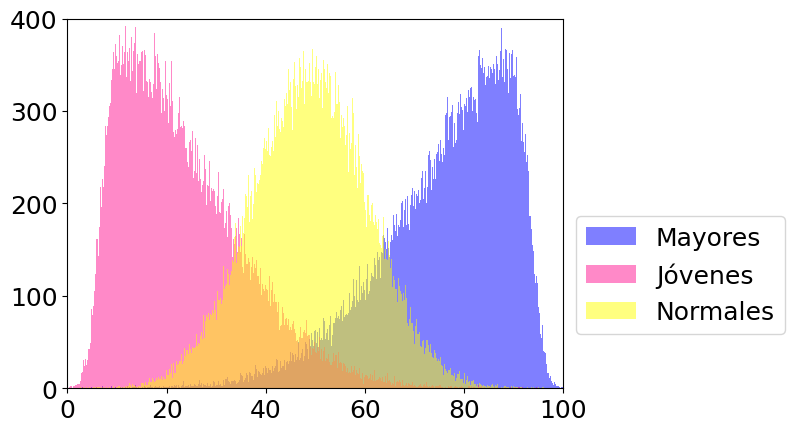

In [17]:
#No olvidar que skewnorm rvs y scipy.stats permite generar valores aleatorios a partir de una distribución normal pero sesgada.
#Sesgo: Controla el sesgo de la distribución (positivo para sesgo a la derecha, negativo para sesgo a la izquierda, 0 para una distribución normal).
def datos_sesgados(sesgo, cantidad, maximo):
    
    aleatorios = stats.skewnorm.rvs(sesgo, 
                                    size=cantidad, #Número de muestras generadas
                                    random_state=1) 
    aleatorios = (aleatorios + abs(aleatorios.min())) #Determina el valor mínimo para recorrer la función normal
    aleatorios = aleatorios/aleatorios.max() * maximo #Escalamiento
    return aleatorios

#Llama a la función
mayores = datos_sesgados(-10, 100000, 100) #Sesgo -10, cantidad 100000 y maximo 100I
plt.hist(mayores, bins=1000, alpha=0.5, label="Mayores", color="blue") 

jovenes = datos_sesgados(10, 100000, 100)
plt.hist(jovenes, bins=1000, alpha=0.5, label="Jóvenes", color="deeppink") 

normales = datos_sesgados(0, 100000, 100)
plt.hist(normales, bins=1000, alpha=0.5, label="Normales", color="yellow") 

plt.ylim([0, 400])
plt.xlim([0, 100])

plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#ILUSTRACIÓN MAYORES

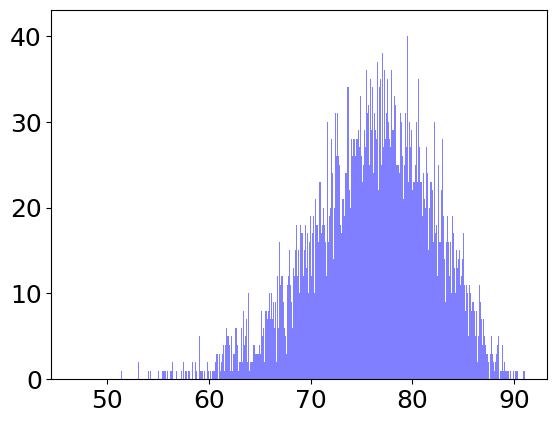

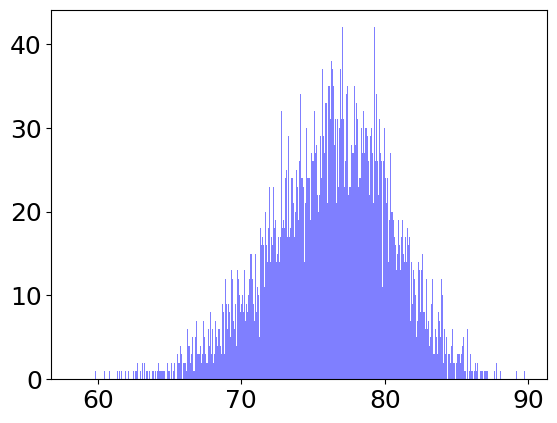

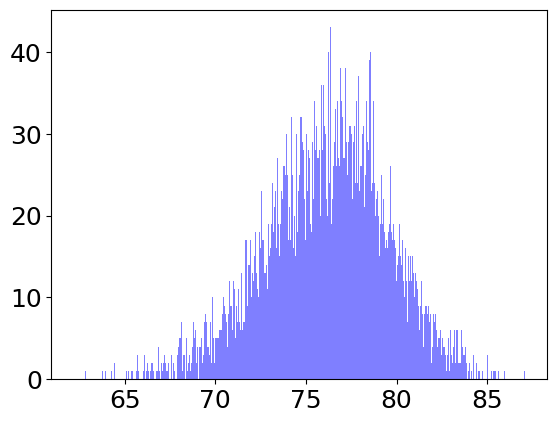

In [13]:
#tamano_muestras = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 10000]
tamano_muestras = [5,10,15] #Obteniendo promedios de la cantidad de muestras que voy a enviar
num_muestras = 10000

for tamano in tamano_muestras: #Itera sobre el tamaño de las muestras
    promedios = np.array([])
    for i in range(num_muestras): # Calcula promedios
        promedios = np.append(promedios, 
                              np.random.choice(mayores, tamano).mean())
    plt.hist(promedios, bins=1000, alpha=0.5, color="blue") 
    plt.show()